In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

In [ ]:
file_name = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(file_name)
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.species.describe()

count           150
unique            3
top       virginica
freq             50
Name: species, dtype: object

<Figure size 864x504 with 0 Axes>

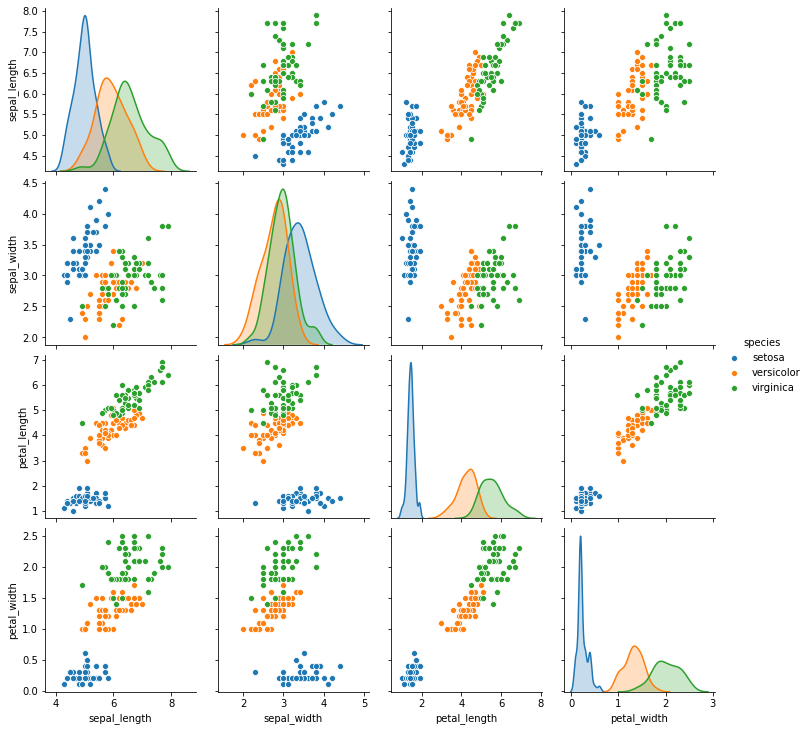

In [ ]:
plt.figure(figsize=(12,7))
sns.pairplot(data=df,hue='species')

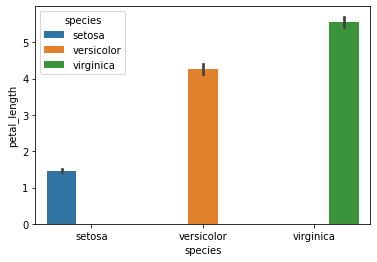

In [ ]:
sns.barplot(x=df.species,y=df.petal_length,hue=df.species)

In [ ]:
y=df.iloc[:,-1]
X=df.drop(columns='species')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Training model

In [ ]:
model= LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Testing model

In [ ]:
acc=model.score(X_test,y_test)
coeffients=model.coef_
intercept=model.intercept_
y_predict=model.predict(X_test)

In [ ]:
print(f"Model accuracy: {acc} ; \n Coeffients:\n {coeffients},\n Y-intercepts:\n {intercept}" )

Model accuracy: 1.0 ; 
 Coeffients:
 [[ 0.35178242  1.42137918 -2.12631061 -0.98317295]
 [ 0.50528549 -1.6543333   0.38313158 -1.10051681]
 [-1.56371472 -1.43016558  2.32966453  2.27003687]],
 Y-intercepts:
 [ 0.22150735  1.13585572 -1.16698892]


In [ ]:
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  9]])

In [ ]:
report=classification_report(y_test,y_predict,labels=['setosa', 'versicolor', 'virginica'])

Saving the trained model

In [ ]:
with open("iris_classification_model.pickle","wb") as f:
  pickle.dump(model,f)

Reloading the trained model

In [ ]:
pickle_model=open("iris_classification_model.pickle","rb")
model2=pickle.load(pickle_model)

In [ ]:
y_predict=model2.predict(X_test)

In [ ]:
y_predict

array(['setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa'], dtype=object)

In [ ]:
y_test

41         setosa
105     virginica
71     versicolor
11         setosa
37         setosa
18         setosa
96     versicolor
43         setosa
13         setosa
130     virginica
15         setosa
95     versicolor
2          setosa
94     versicolor
110     virginica
104     virginica
40         setosa
77     versicolor
63     versicolor
29         setosa
51     versicolor
42         setosa
142     virginica
120     virginica
113     virginica
140     virginica
56     versicolor
72     versicolor
121     virginica
45         setosa
Name: species, dtype: object